In [1]:
# !pip install pandas

In [2]:
# !pip install matplotlib

In [3]:
# !pip install seaborn

In [4]:
# !pip install opencv-python

In [5]:
# !pip install scikit-learn

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import tensorflow as tf
import matplotlib.cm as cm
import cv2
import math

In [7]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import ReduceLROnPlateau
# from sklearn.metrics import classification_report

In [8]:
input_dir = "D:/Thesis dataset/FINAL DATASET/4k_UNIQUE_Test/"
train_dir = input_dir +"train/"
test_dir = input_dir +"test/"

In [9]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
       rotation_range=10,
       width_shift_range=0.1,
       height_shift_range=0.1,
       shear_range=0.1,
       zoom_range=0.1,
       #horizontal_flip=True,
       fill_mode='nearest',
      validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        subset='training'

)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle = False
)
validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        subset='validation'
)
#class_weights = {0: 1.0, 1: 3.43, 2: 4.61, 3: 1.41}

Found 63588 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.
Found 15896 images belonging to 4 classes.


In [10]:
model = Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),

    # Conv block 1
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', name="Conv_1-1"),
    MaxPooling2D(pool_size=(2,2), strides=2),

    # Conv block 2
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', name="Conv_2-1"),
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', name="Conv_2-2"),
    MaxPooling2D(pool_size=(2,2), strides=2),

    # Conv block 3
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', name="Conv_3-1"),
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', name="Conv_3-2"),
    Conv2D(48, kernel_size=(3,3), padding='same', activation='relu', name="Conv_3-3"),
    MaxPooling2D(pool_size=(2,2), strides=2),

    # Conv block 4
    Conv2D(48, kernel_size=(3,3), padding='same', activation='relu', name="Conv_4-1"),
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', name="Conv_4-2"),
    MaxPooling2D(pool_size=(2,2), strides=2),

    # Flatten
    Flatten(),

    # Fully connected layers
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    #Dense(4, activation='relu'),
    #Dropout(0.4),

    # Output layer
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1-1 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 Conv_2-1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 Conv_2-2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 Conv_3-1 (Conv2D)           (None, 56, 56, 32)        9

In [11]:
import tensorflow_addons as tfa
lr = 0.001
model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy', tfa.metrics.F1Score(num_classes=4), Precision(), Recall()]
    )

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

In [13]:
history = model.fit_generator(
    train_generator,
#     steps_per_epoch = 50,
    epochs = 50,
    validation_data = validation_generator,
    #validation_steps = 50
    #class_weight = class_weights
    callbacks = [reduce_lr]
)

Epoch 1/50
994/994 [==============================] - 1861s 2s/step - loss: 0.6727 - accuracy: 0.7450 - f1_score: 0.5772 - precision: 0.8307 - recall: 0.6584 - val_loss: 0.3749 - val_accuracy: 0.8695 - val_f1_score: 0.7720 - val_precision: 0.8909 - val_recall: 0.8467 - lr: 0.0010
Epoch 2/50
994/994 [==============================] - 1008s 1s/step - loss: 0.3099 - accuracy: 0.8940 - f1_score: 0.8375 - precision: 0.9036 - recall: 0.8845 - val_loss: 0.2085 - val_accuracy: 0.9358 - val_f1_score: 0.9004 - val_precision: 0.9427 - val_recall: 0.9280 - lr: 0.0010
Epoch 3/50
994/994 [==============================] - 994s 1000ms/step - loss: 0.2224 - accuracy: 0.9252 - f1_score: 0.8879 - precision: 0.9299 - recall: 0.9207 - val_loss: 0.2080 - val_accuracy: 0.9330 - val_f1_score: 0.8949 - val_precision: 0.9392 - val_recall: 0.9267 - lr: 0.0010
Epoch 4/50
994/994 [==============================] - 713s 717ms/step - loss: 0.1952 - accuracy: 0.9352 - f1_score: 0.9030 - precision: 0.9392 - recall: 0

In [14]:
best_epoch = np.argmax(history.history['val_accuracy']) + 1  # Adding 1 as epochs start from 1, not 0

# Find the value of the maximum validation accuracy
best_accuracy = np.max(history.history['val_accuracy'])

print(f"The best validation accuracy was {best_accuracy:.4f} at epoch {best_epoch}")

The best validation accuracy was 0.9580 at epoch 35


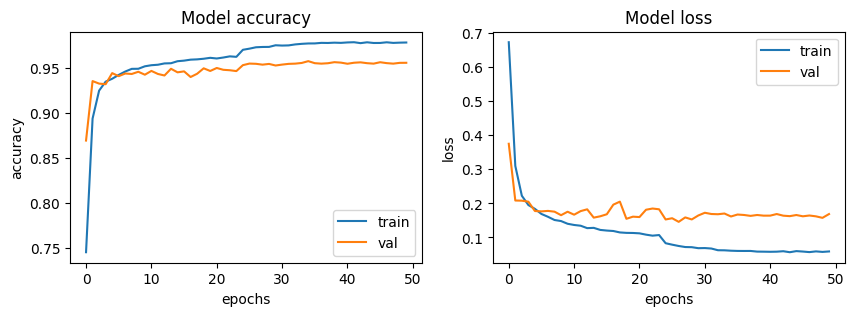

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [18]:
# Evaluate the model on test set
test_loss, test_accuracy, test_f1, test_precision, test_recall = model.evaluate(test_generator)

# Print evaluation metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test f1 score: {test_f1}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')

63/63 [==============================] - 11s 162ms/step - loss: 0.2052 - accuracy: 0.9348 - f1_score: 0.9346 - precision: 0.9355 - recall: 0.9348
Test Loss: 0.2051921784877777
Test Accuracy: 0.9347500205039978
Test f1 score: [0.93602693 0.9406825  0.92107993 0.9406699 ]
Test Precision: 0.9354515671730042
Test Recall: 0.9347500205039978


In [19]:


# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels for the test set
true_labels = test_generator.classes

# Ensure the true labels and predicted labels have the same length
if predicted_classes.shape[0] != true_labels.shape[0]:
    n_seq = true_labels.shape[0] // predicted_classes.shape[0]
    true_labels = np.repeat(true_labels, n_seq)

# Generate a classification report
report = classification_report(true_labels, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

63/63 [==============================] - 10s 154ms/step
              precision    recall  f1-score   support

         CNV       0.90      0.97      0.94      1000
         DME       0.99      0.90      0.94      1000
      DRUSEN       0.96      0.89      0.92      1000
      Normal       0.90      0.98      0.94      1000

    accuracy                           0.93      4000
   macro avg       0.94      0.93      0.93      4000
weighted avg       0.94      0.93      0.93      4000



63/63 [==============================] - 10s 155ms/step


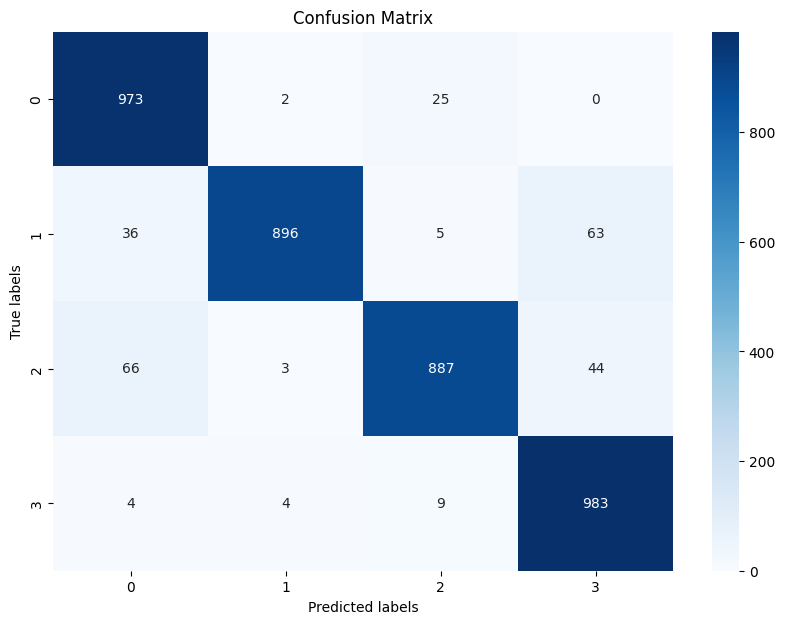

In [20]:
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

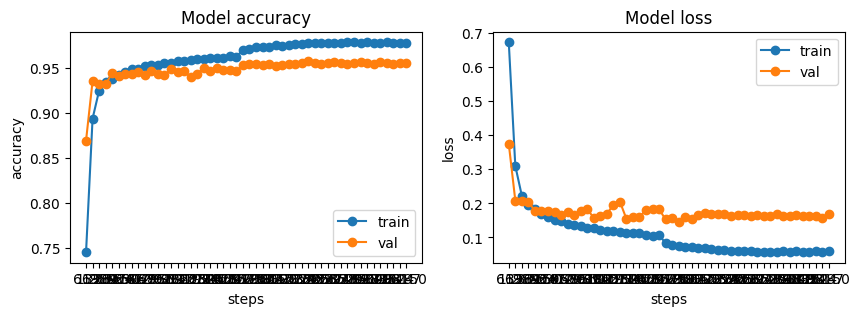

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# import math

epochs = len(history.history['loss'])
batch_size = 96
train_data_size = 63588

steps_per_epoch = math.ceil(train_data_size / batch_size)
total_steps = np.arange(steps_per_epoch, epochs * steps_per_epoch + 1, steps_per_epoch)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(total_steps, history.history[met], '-o')
    ax[i].plot(total_steps, history.history['val_' + met], '-o')
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('steps')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    ax[i].set_xticks(total_steps)

In [22]:
model.save('C:/Users/user/projects/t81_558_deep_learning/Abletion test/Layer selection/saved models/8_layer_Abletion_v1.h5')

In [23]:
from sklearn.metrics import f1_score

# Get true labels for the test set
true_labels = test_generator.classes

# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Compute the F1 score for each class
f1_per_class = f1_score(true_labels, predicted_classes, average=None)

# Compute the average F1 score across all classes
average_f1 = sum(f1_per_class) / len(f1_per_class)

# Print the F1 score for each class
for i, f1_class in enumerate(f1_per_class):
    print(f'F1 Score for Class {i}: {f1_class}')

# Print the average F1 score
print(f'Average F1 Score: {average_f1}')


63/63 [==============================] - 10s 157ms/step
F1 Score for Class 0: 0.936026936026936
F1 Score for Class 1: 0.9406824146981628
F1 Score for Class 2: 0.9210799584631361
F1 Score for Class 3: 0.9406698564593301
Average F1 Score: 0.9346147914118912


# GRADCAM


In [24]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

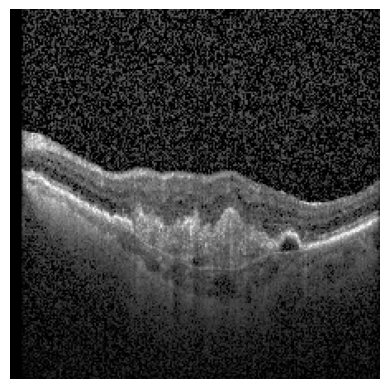

1/1 [==============================] - 0s 443ms/step


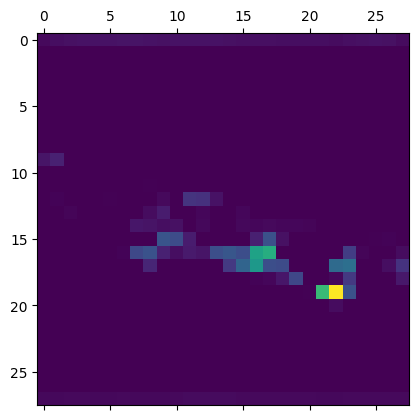

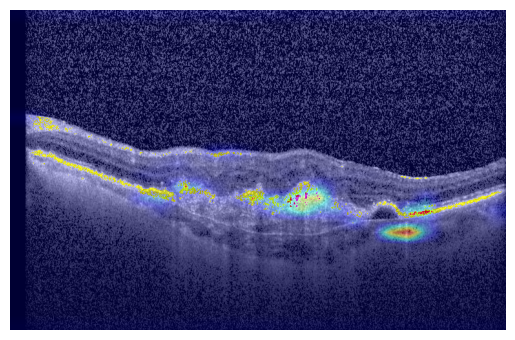

In [25]:
# Load your image
# Specify the path to an image in your test set
img_path = 'D:/Thesis dataset/FINAL DATASET/4k_UNIQUE_Test/test/CNV/CNV-163081-230.JPEG'
 # Replace with your local image path
img = load_img(img_path, color_mode='grayscale', target_size=(224, 224))  # Set color_mode to 'grayscale'
img = img_to_array(img)

img = np.expand_dims(img, axis=0)
img = np.repeat(img, 3, axis=-1)
# img = preprocess_input(img)
img /= 255.0
# Display the image
plt.imshow(np.squeeze(img))  # Divide by 255.0 if img_rgb is scaled from 0 to 255
plt.axis('off')  # Hide the axis
plt.show()




# Predict the class (index)
preds = model.predict(img)
pred_index = np.argmax(preds[0])

# Generate class activation heatmap
last_conv_layer_name = 'Conv_4-2'  # Change to match the name of the last conv layer in your model
classifier_layer_names = []  # You may not need this for Sequential models
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name, classifier_layer_names, pred_index)

# Display heatmap
plt.matshow(heatmap)
plt.show()

# We load the original image
# We load the original grayscale image
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize the heatmap to match the original image size
heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on grayscale image
superimposed_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR format
superimposed_img = heatmap * 0.4 + superimposed_img
superimposed_img = superimposed_img.astype('uint8')

# Superimpose the heatmap on original image
# superimposed_img = heatmap * 0.4 + original_img

# Save the image to disk
save_path = 'D:/Thesis dataset/FINAL DATASET/GRADCAM SAVED IMAGES/Ablation/8 layer/CNV-163081-230.JPEG'  # Replace with your save path
cv2.imwrite(save_path, superimposed_img)

# Display Image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

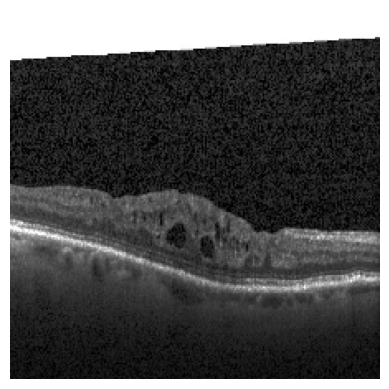

1/1 [==============================] - 0s 20ms/step


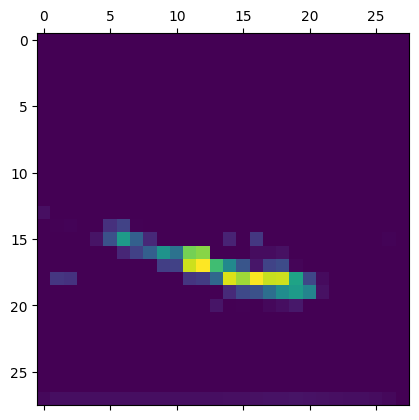

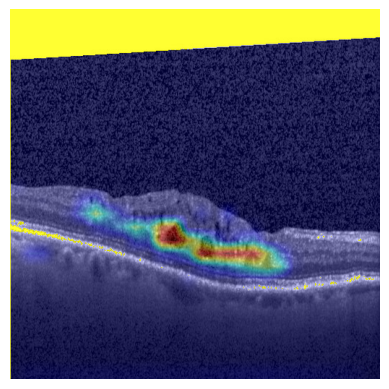

In [26]:
# Load your image

img_path ='D:/Thesis dataset/FINAL DATASET/4k_UNIQUE_Test/test/DME/DME-30521-17.jpeg'  # Replace with your local image path
img = load_img(img_path, color_mode='grayscale', target_size=(224, 224))  # Set color_mode to 'grayscale'
img = img_to_array(img)

img = np.expand_dims(img, axis=0)
img = np.repeat(img, 3, axis=-1)
# img = preprocess_input(img)
img /= 255.0
# Display the image
plt.imshow(np.squeeze(img))  # Divide by 255.0 if img_rgb is scaled from 0 to 255
plt.axis('off')  # Hide the axis
plt.show()

# Predict the class (index)
preds = model.predict(img)
pred_index = np.argmax(preds[0])

# Generate class activation heatmap
last_conv_layer_name = 'Conv_4-2'  # Change to match the name of the last conv layer in your model
classifier_layer_names = []  # You may not need this for Sequential models
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name, classifier_layer_names, pred_index)

# Display heatmap
plt.matshow(heatmap)
plt.show()

# We load the original image
# We load the original grayscale image
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize the heatmap to match the original image size
heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on grayscale image
superimposed_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR format
superimposed_img = heatmap * 0.4 + superimposed_img
superimposed_img = superimposed_img.astype('uint8')

# Superimpose the heatmap on original image
# superimposed_img = heatmap * 0.4 + original_img

# Save the image to disk
save_path = 'D:/Thesis dataset/FINAL DATASET/GRADCAM SAVED IMAGES/Ablation/8 layer/DME-30521-17.jpeg'  # Replace with your save path
cv2.imwrite(save_path, superimposed_img)

# Display Image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

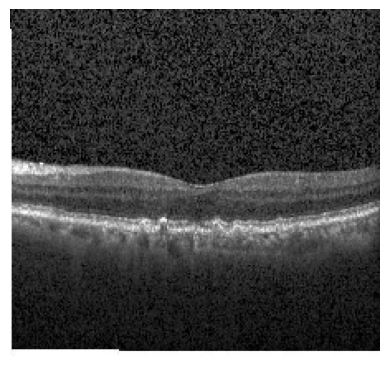

1/1 [==============================] - 0s 19ms/step


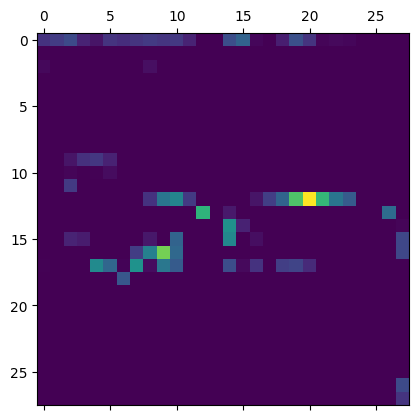

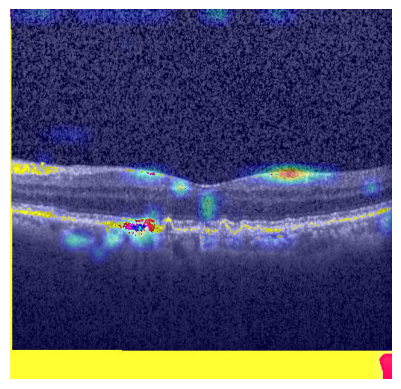

In [27]:
# Load your image

img_path ='D:/Thesis dataset/FINAL DATASET/4k_UNIQUE_Test/test/DRUSEN/DRUSEN-95633-23.jpeg'  # Replace with your local image path
img = load_img(img_path, color_mode='grayscale', target_size=(224, 224))  # Set color_mode to 'grayscale'
img = img_to_array(img)

img = np.expand_dims(img, axis=0)
img = np.repeat(img, 3, axis=-1)
# img = preprocess_input(img)
img /= 255.0
# Display the image
plt.imshow(np.squeeze(img))  # Divide by 255.0 if img_rgb is scaled from 0 to 255
plt.axis('off')  # Hide the axis
plt.show()

# Predict the class (index)
preds = model.predict(img)
pred_index = np.argmax(preds[0])

# Generate class activation heatmap
last_conv_layer_name = 'Conv_4-2'  # Change to match the name of the last conv layer in your model
classifier_layer_names = []  # You may not need this for Sequential models
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name, classifier_layer_names, pred_index)

# Display heatmap
plt.matshow(heatmap)
plt.show()

# We load the original image
# We load the original grayscale image
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize the heatmap to match the original image size
heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on grayscale image
superimposed_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR format
superimposed_img = heatmap * 0.4 + superimposed_img
superimposed_img = superimposed_img.astype('uint8')

# Superimpose the heatmap on original image
# superimposed_img = heatmap * 0.4 + original_img

# Save the image to disk
save_path ='D:/Thesis dataset/FINAL DATASET/GRADCAM SAVED IMAGES/Ablation/8 layer/DRUSEN-95633-23.jpeg'  # Replace with your save path
cv2.imwrite(save_path, superimposed_img)

# Display Image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

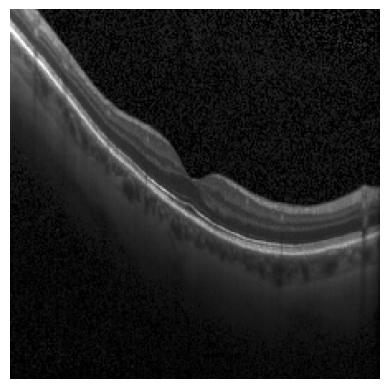

1/1 [==============================] - 0s 19ms/step


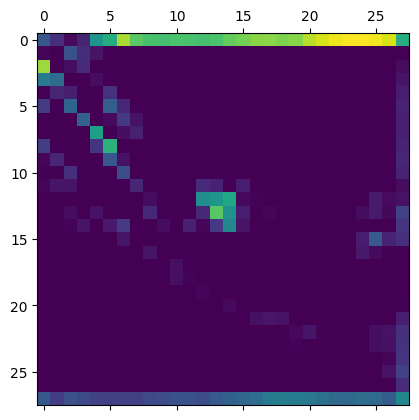

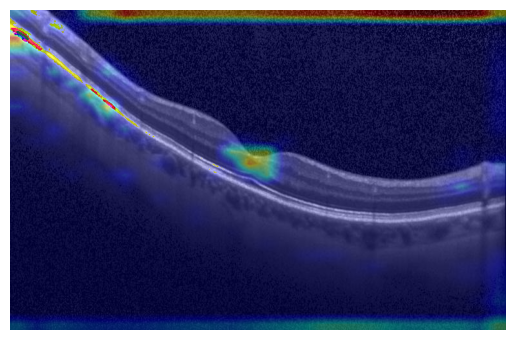

In [28]:
# Load your image
img_path = 'D:/Thesis dataset/FINAL DATASET/4k_UNIQUE_Test/test/NORMAL/NORMAL-33637-1.jpeg' # Replace with your local image path
img = load_img(img_path, color_mode='grayscale', target_size=(224, 224))  # Set color_mode to 'grayscale'
img = img_to_array(img)

img = np.expand_dims(img, axis=0)
img = np.repeat(img, 3, axis=-1)
# img = preprocess_input(img)
img /= 255.0
# Display the image
plt.imshow(np.squeeze(img))  # Divide by 255.0 if img_rgb is scaled from 0 to 255
plt.axis('off')  # Hide the axis
plt.show()

# Predict the class (index)
preds = model.predict(img)
pred_index = np.argmax(preds[0])

# Generate class activation heatmap
last_conv_layer_name = 'Conv_4-2'  # Change to match the name of the last conv layer in your model
classifier_layer_names = []  # You may not need this for Sequential models
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name, classifier_layer_names, pred_index)

# Display heatmap
plt.matshow(heatmap)
plt.show()

# We load the original image
# We load the original grayscale image
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize the heatmap to match the original image size
heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on grayscale image
superimposed_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR format
superimposed_img = heatmap * 0.4 + superimposed_img
superimposed_img = superimposed_img.astype('uint8')

# Superimpose the heatmap on original image
# superimposed_img = heatmap * 0.4 + original_img

# Save the image to disk
save_path = 'D:/Thesis dataset/FINAL DATASET/GRADCAM SAVED IMAGES/Ablation/8 layer/NORMAL-33637-1.jpeg'  # Replace with your save path
cv2.imwrite(save_path, superimposed_img)

# Display Image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## (750 + 250)

Found 4000 images belonging to 4 classes.
63/63 [==============================] - 9s 146ms/step - loss: 0.0997 - accuracy: 0.9670 - f1_score: 0.9670 - precision: 0.9670 - recall: 0.9663
Test Loss: 0.09971380978822708
Test Accuracy: 0.9670000076293945
Test f1 score: [0.966456   0.97503823 0.9562533  0.97005403]
Test Precision: 0.966975212097168
Test Recall: 0.9662500023841858
63/63 [==============================] - 9s 146ms/step
              precision    recall  f1-score   support

         CNV       0.94      0.99      0.97      1000
         DME       0.99      0.96      0.98      1000
      DRUSEN       0.99      0.93      0.96      1000
      NORMAL       0.95      0.99      0.97      1000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

63/63 [==============================] - 9s 146ms/step


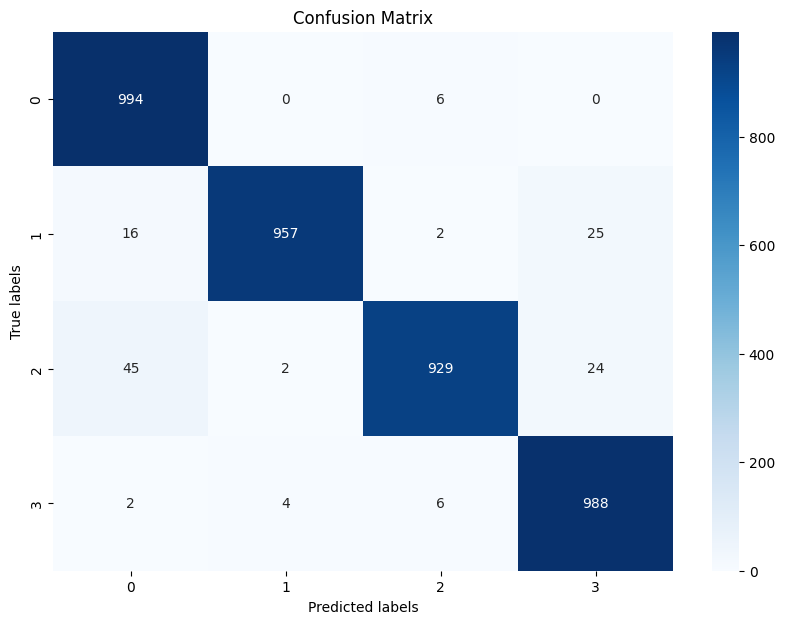

In [30]:
input_dir = "D:/Thesis dataset/vgg16/visualization/"
train_dir = input_dir +"train/"
test_dir = input_dir +"test(750+250)/"


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle = False
)


test_loss, test_accuracy, test_f1, test_precision, test_recall = model.evaluate(test_generator)

# Print evaluation metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test f1 score: {test_f1}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')


# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels for the test set
true_labels = test_generator.classes

# Ensure the true labels and predicted labels have the same length
if predicted_classes.shape[0] != true_labels.shape[0]:
    n_seq = true_labels.shape[0] // predicted_classes.shape[0]
    true_labels = np.repeat(true_labels, n_seq)

# Generate a classification report
report = classification_report(true_labels, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)


# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import f1_score

# Get true labels for the test set
true_labels = test_generator.classes

# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Compute the F1 score for each class
f1_per_class = f1_score(true_labels, predicted_classes, average=None)

# Compute the average F1 score across all classes
average_f1 = sum(f1_per_class) / len(f1_per_class)

# Print the F1 score for each class
for i, f1_class in enumerate(f1_per_class):
    print(f'F1 Score for Class {i}: {f1_class}')

# Print the average F1 score
print(f'Average F1 Score: {average_f1}')


63/63 [==============================] - 10s 158ms/step
F1 Score for Class 0: 0.9664560038891589
F1 Score for Class 1: 0.9750382068262862
F1 Score for Class 2: 0.9562532166752445
F1 Score for Class 3: 0.970054000981836
Average F1 Score: 0.9669503570931315
